In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import random
import prettytable

In [2]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import os # accessing directory structure
import matplotlib.pyplot as mp

import seaborn as sb
# test classification dataset
from sklearn.datasets import make_classification

# test regression dataset
from sklearn.datasets import make_regression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path copied = /content/drive/MyDrive/train.csv
training_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
testing_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [5]:
training_data.shape

(395, 33)

In [6]:
testing_data.shape

NameError: name 'testing_data' is not defined

In [7]:
training_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
null_check = pd.isnull(training_data["age"])
null_team_data = training_data[null_check]

In [9]:
missing_values_count = null_check.sum()
print("Count of missing values in the 'Team' column:", missing_values_count)

Count of missing values in the 'Team' column: 0


In [10]:
#missing values
print('#missing values')
print(training_data.isnull().sum())
#total missing values
print('total missing values')
print(training_data.isnull().sum().sum())
# missing values percentage
print('missing values percentage')
print(training_data.isnull().sum()*100/len(training_data))

#missing values
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
total missing values
0
missing values percentage
school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.

In [11]:
training_data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
training_data.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [14]:
training_data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [15]:
(training_data.isnull().sum()/(len(training_data)))*100

,0
school,0.0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
Mjob,0.0
Fjob,0.0


In [16]:
#Exploratory

In [17]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [18]:
training_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#mean of the popullation
mean_pop = training_data["age"].mean()
std_pop = training_data["age"].std()
print("μ and σ of overall purchases are {} and {} units respectively.".format(round(mean_pop,2),round(std_pop,2)))

μ and σ of overall purchases are 16.7 and 1.28 units respectively.


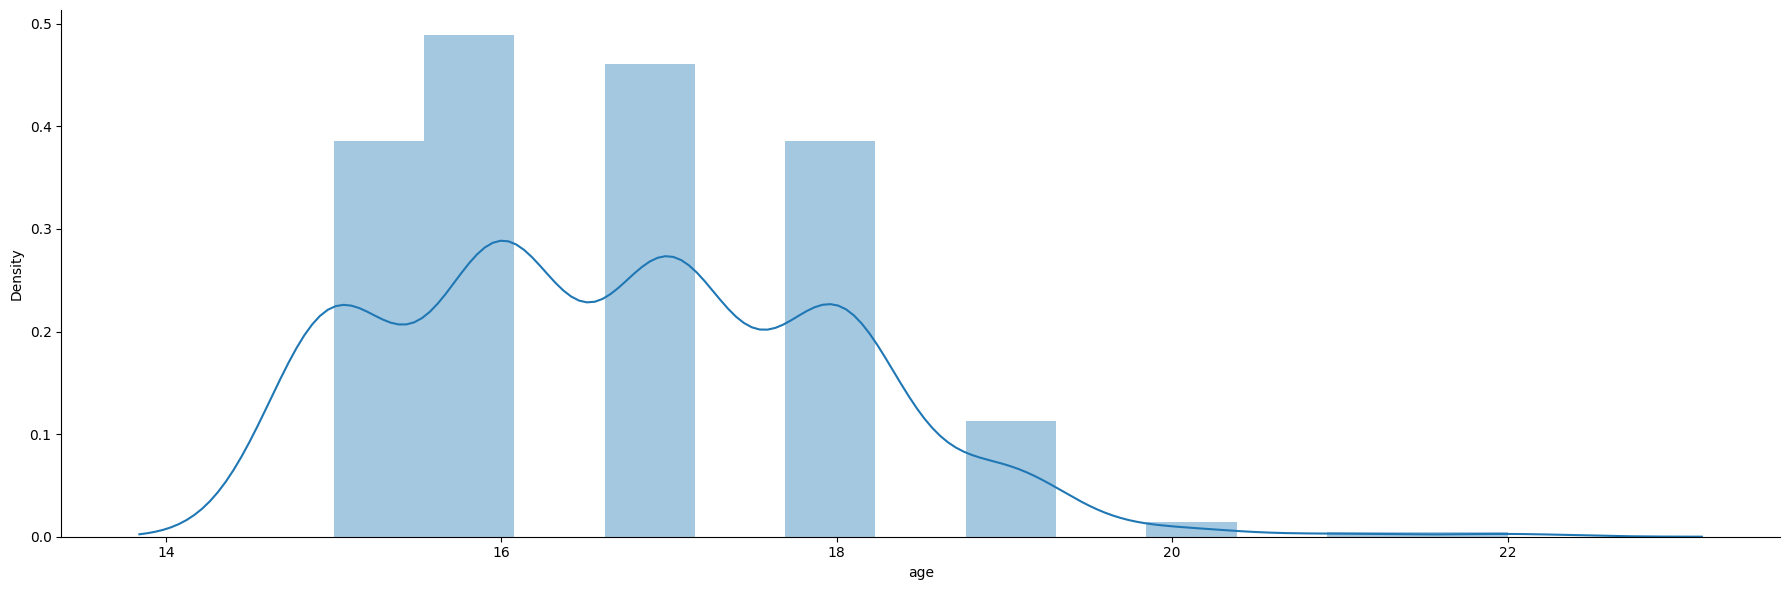

In [21]:
sns.FacetGrid(training_data,height=6,aspect=3).map(sns.distplot,"age")
plt.show()

In [22]:
def sample_mean_distribution(data, samples_count, data_points_count):
    #list to append all samples
    samples_list = list()
    #data in array
    data = np.array(data.values)
    for i in range(0, samples_count):
        samples = random.sample(range(0, data.shape[0]), data_points_count)
        samples_list.append(data[samples].mean())
    #return array of sample mean
    return np.array(samples_list)

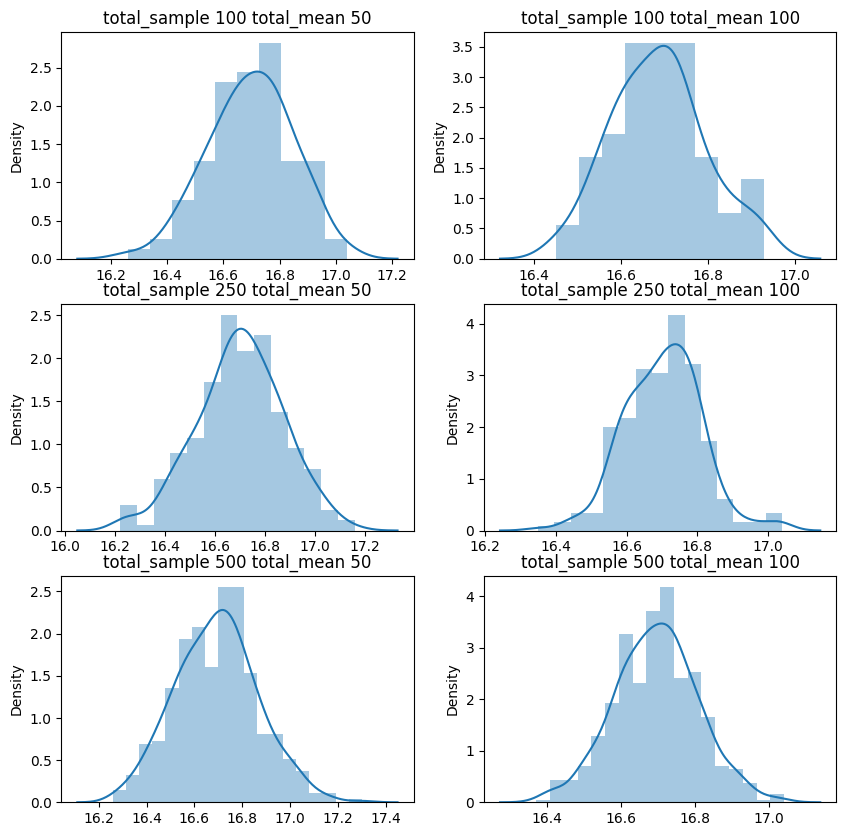

In [24]:
cnt = 0
sample_mean = list()
#setting figures
fg, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
#list of samples and datapoints combinations
lst = [(100,50),(100,100),(250,50),(250,100),(500,50),(500,100)]
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_title("total_sample " + str(lst[cnt][0]) + " total_mean " + str(lst[cnt][1]))
        sns.distplot(sample_mean_distribution(training_data["age"], lst[cnt][0],lst[cnt][1]),ax = ax[i,j])
        sample_mean.append(sample_mean_distribution(training_data["age"], lst[cnt][0],lst[cnt][1]))
        cnt +=1

In [25]:
#calculating output
def sample_output(data, population_mean, population_sd,total_sample_points_list):
    df = pd.DataFrame()
    mean_sample = list(); std_sample = list(); std_approx = list(); strings_list = list()
    pop_mean = list(); pop_std = list()
    #calculating sample values
    for idx, val in enumerate(data):
        pop_mean.append(round(population_mean,2))
        pop_std.append(round(population_sd,2))
        mean_sample.append(round(val.mean(),2))
        std_sample.append(round(val.std(),2))
        std_approx.append(round(population_sd/np.sqrt((total_sample_points_list[idx][1])),2))
        strings_list.append("total_sample_" + str(total_sample_points_list[idx][0]) + "_total_mean_"
                            + str(total_sample_points_list[idx][1]))
    df["name"] = pd.Series(strings_list); df["battery_Power_mean"] = pd.Series(pop_mean)
    df["sample_mean"] = pd.Series(mean_sample); df["battery_Power_std"] = pd.Series(pop_std)
    df["sample_std"] = pd.Series(std_sample); df["battery_Power_approx_std"] = pd.Series(std_approx)

    return df

In [26]:
output_df = sample_output(sample_mean, mean_pop, std_pop,lst)
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std
0,total_sample_100_total_mean_50,16.7,16.70,1.28,0.15,0.18
1,total_sample_100_total_mean_100,16.7,16.68,1.28,0.11,0.13
2,total_sample_250_total_mean_50,16.7,16.69,1.28,0.17,0.18
3,total_sample_250_total_mean_100,16.7,16.70,1.28,0.11,0.13
4,total_sample_500_total_mean_50,16.7,16.69,1.28,0.17,0.18
5,total_sample_500_total_mean_100,16.7,16.69,1.28,0.11,0.13


In [27]:
ptable = prettytable.PrettyTable(["sample_mean"+u"\u2248"+"orig_mean", "sample_std"+u"\u2248"+"approx_std"])
for i in range(0, len(output_df)):
    row = list()
    row.append(str(output_df["sample_mean"][i])+u"\u2248"+str(output_df["battery_Power_mean"][i]))
    row.append(str(output_df["sample_std"][i])+u"\u2248"+str(output_df["battery_Power_approx_std"][i]))
    ptable.add_row(row)
print(ptable)

+-----------------------+-----------------------+
| sample_mean≈orig_mean | sample_std≈approx_std |
+-----------------------+-----------------------+
|       16.7≈16.7       |       0.15≈0.18       |
|       16.68≈16.7      |       0.11≈0.13       |
|       16.69≈16.7      |       0.17≈0.18       |
|       16.7≈16.7       |       0.11≈0.13       |
|       16.69≈16.7      |       0.17≈0.18       |
|       16.69≈16.7      |       0.11≈0.13       |
+-----------------------+-----------------------+


In [28]:
"""getting lower and upper limit of 95% confidence interval with known standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["battery_Power_approx_std"][i])*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["battery_Power_approx_std"][i])*1.96); upper_lim.append(round(upper_limit,2))

#appending values into the dataset
output_df["lower_limit"] = pd.Series(lower_lim)
output_df["upper_limit"] = pd.Series(upper_lim)

In [29]:
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std,lower_limit,upper_limit
0,total_sample_100_total_mean_50,16.7,16.70,1.28,0.15,0.18,16.35,17.05
1,total_sample_100_total_mean_100,16.7,16.68,1.28,0.11,0.13,16.43,16.93
2,total_sample_250_total_mean_50,16.7,16.69,1.28,0.17,0.18,16.34,17.04
3,total_sample_250_total_mean_100,16.7,16.70,1.28,0.11,0.13,16.45,16.95
4,total_sample_500_total_mean_50,16.7,16.69,1.28,0.17,0.18,16.34,17.04
5,total_sample_500_total_mean_100,16.7,16.69,1.28,0.11,0.13,16.44,16.94


In [30]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); upper_lim.append(round(upper_limit,2))
#appending values into the dataset
output_df["lower_limit_wt_sd"] = pd.Series(lower_lim)
output_df["upper_limit_wt_sd"] = pd.Series(upper_lim)

In [31]:
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd
0,total_sample_100_total_mean_50,16.7,16.70,1.28,0.15,0.18,16.35,17.05,16.66,16.74
1,total_sample_100_total_mean_100,16.7,16.68,1.28,0.11,0.13,16.43,16.93,16.66,16.70
2,total_sample_250_total_mean_50,16.7,16.69,1.28,0.17,0.18,16.34,17.04,16.64,16.74
3,total_sample_250_total_mean_100,16.7,16.70,1.28,0.11,0.13,16.45,16.95,16.68,16.72
4,total_sample_500_total_mean_50,16.7,16.69,1.28,0.17,0.18,16.34,17.04,16.64,16.74
5,total_sample_500_total_mean_100,16.7,16.69,1.28,0.11,0.13,16.44,16.94,16.67,16.71


In [32]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    upper_lim.append(round(upper_limit,2))
#appending values into the dataset
output_df["lower_limit_99"] = pd.Series(lower_lim)
output_df["upper_limit_99"] = pd.Series(upper_lim)

In [33]:
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd,lower_limit_99,upper_limit_99
0,total_sample_100_total_mean_50,16.7,16.70,1.28,0.15,0.18,16.35,17.05,16.66,16.74,16.65,16.75
1,total_sample_100_total_mean_100,16.7,16.68,1.28,0.11,0.13,16.43,16.93,16.66,16.70,16.65,16.71
2,total_sample_250_total_mean_50,16.7,16.69,1.28,0.17,0.18,16.34,17.04,16.64,16.74,16.63,16.75
3,total_sample_250_total_mean_100,16.7,16.70,1.28,0.11,0.13,16.45,16.95,16.68,16.72,16.67,16.73
4,total_sample_500_total_mean_50,16.7,16.69,1.28,0.17,0.18,16.34,17.04,16.64,16.74,16.63,16.75
5,total_sample_500_total_mean_100,16.7,16.69,1.28,0.11,0.13,16.44,16.94,16.67,16.71,16.66,16.72


Histogram of Price Range


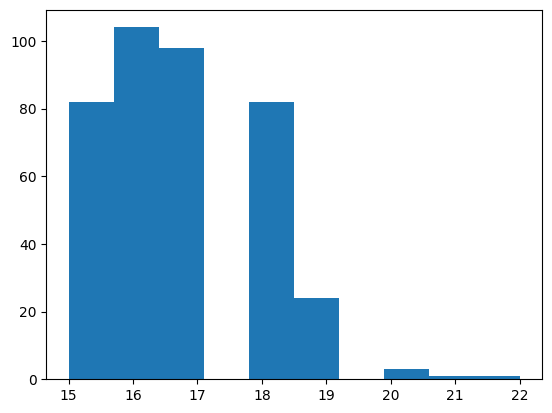

In [34]:
print ('Histogram of Price Range')
pyplot.hist(training_data['age'])
pyplot.show()

Histogram of Price Range


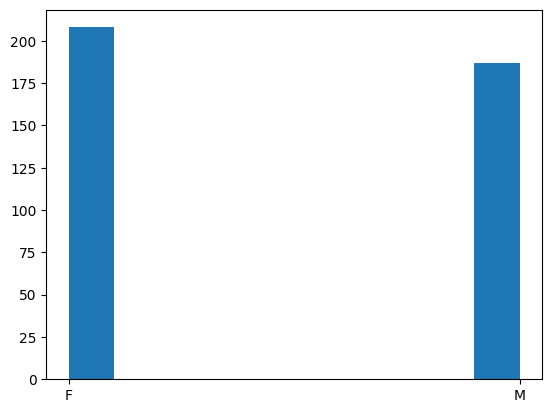

In [35]:
print ('Histogram of Price Range')
pyplot.hist(training_data['sex'])
pyplot.show()

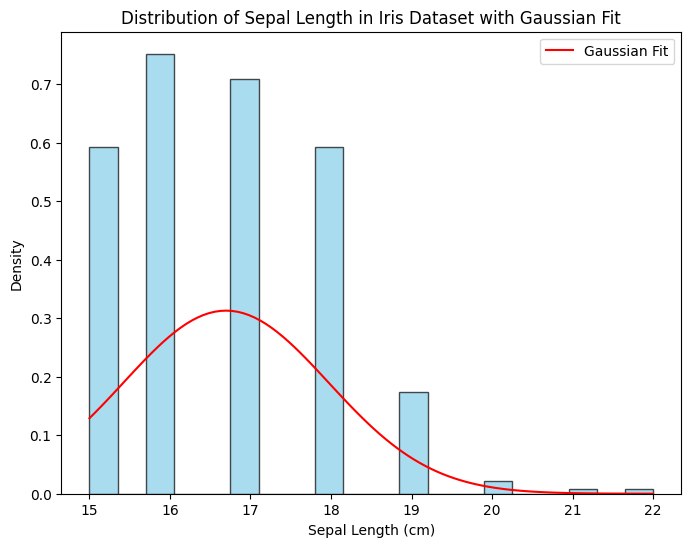

In [36]:
import matplotlib.pyplot as plt
import numpy as np

age = training_data['age']

mu, std = np.mean(age), np.std(age)
x = np.linspace(np.min(age), np.max(age), 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std)**2)

plt.figure(figsize=(8, 6))
plt.hist(age, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.plot(x, y, color='red', label='Gaussian Fit')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.title('Distribution of Sepal Length in Iris Dataset with Gaussian Fit')
plt.legend()
plt.show()

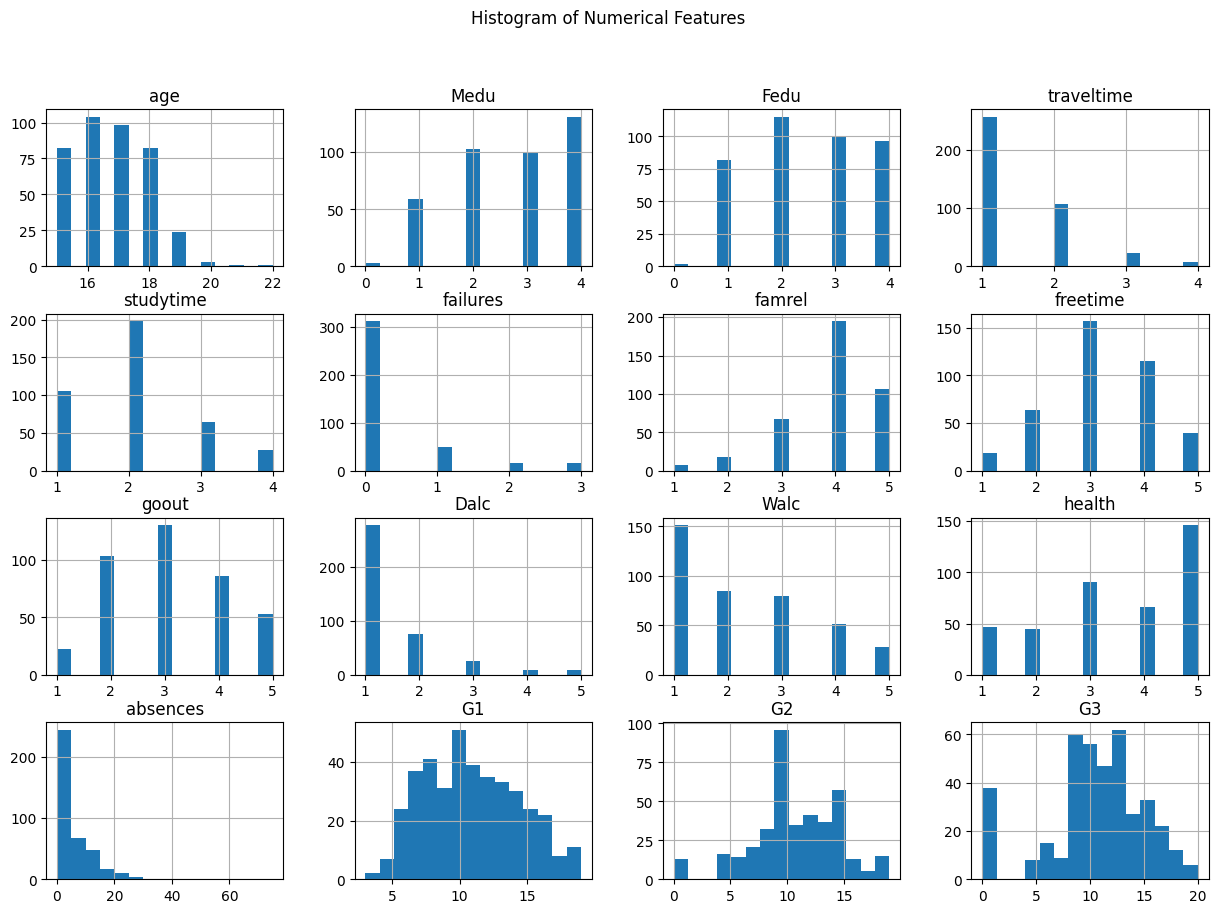

In [37]:
# Histogram of numerical features
training_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features")
plt.show()

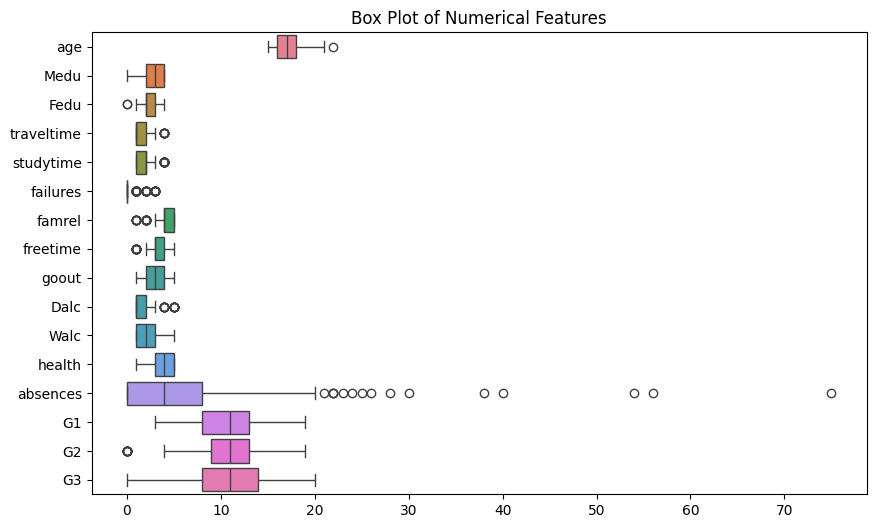

In [38]:
# Box plot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data, orient="h")
plt.title("Box Plot of Numerical Features")
plt.show()

In [40]:
numeric_data = training_data.select_dtypes(include=[float, int])

# Detect outliers using the IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_outliers_removed = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Number of rows before removing outliers: {training_data.shape[0]}')
print(f'Number of rows after removing outliers: {data_outliers_removed.shape[0]}')

Number of rows before removing outliers: 395
Number of rows after removing outliers: 232


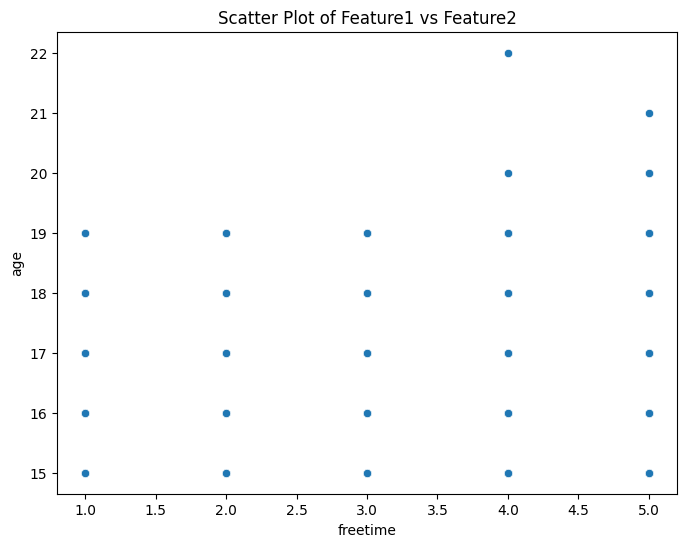

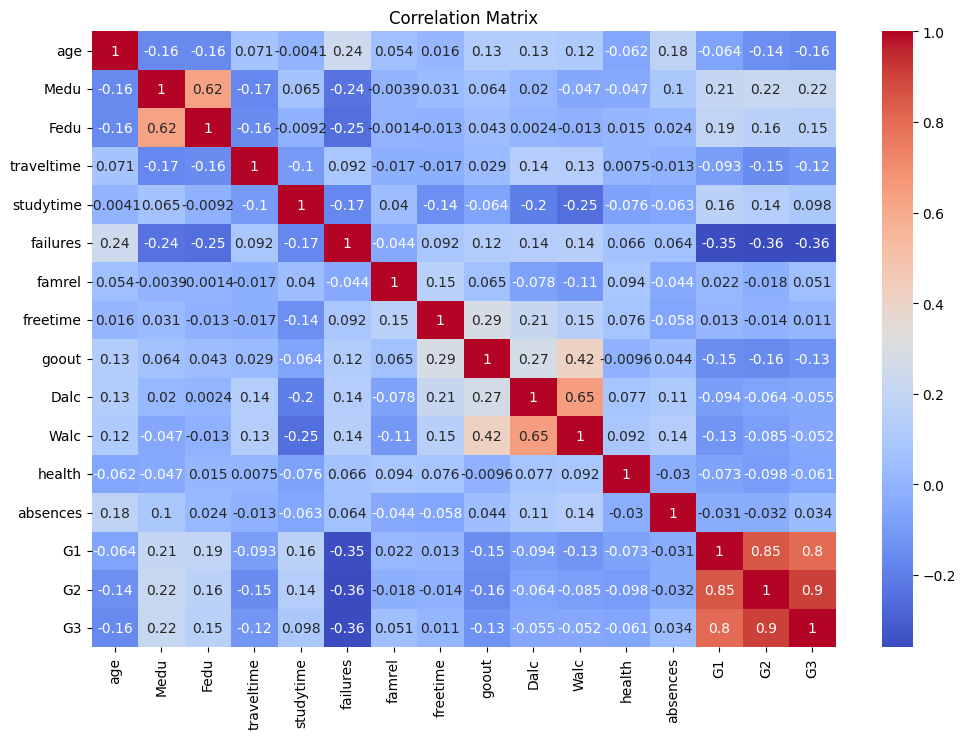

In [44]:
# Scatter plot for two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=training_data, x='freetime', y='age')
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.show()

x
numeric_data = training_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

age
Skew : 0.47


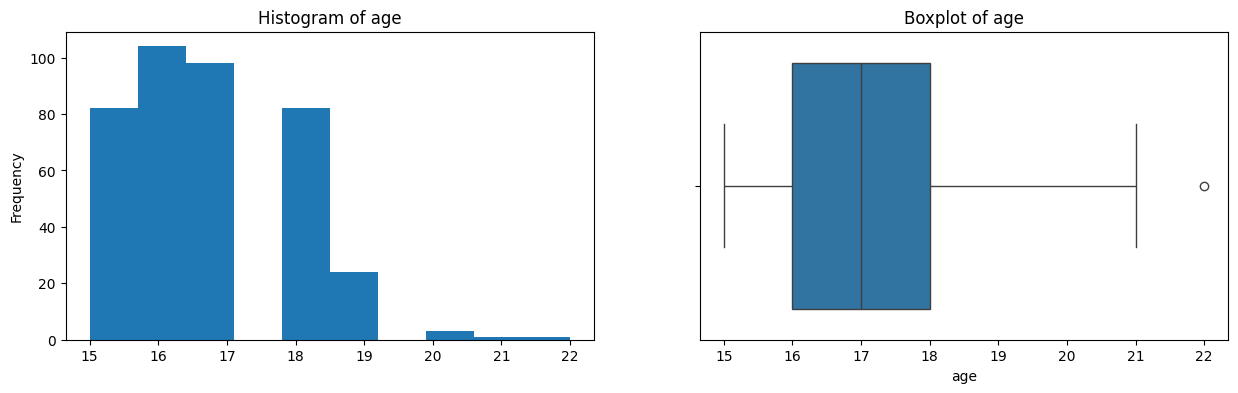

Medu
Skew : -0.32


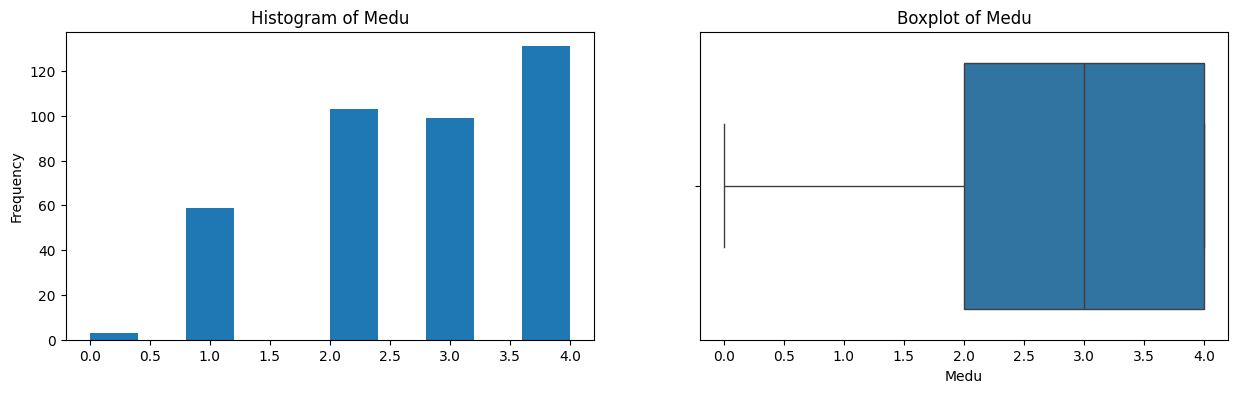

Fedu
Skew : -0.03


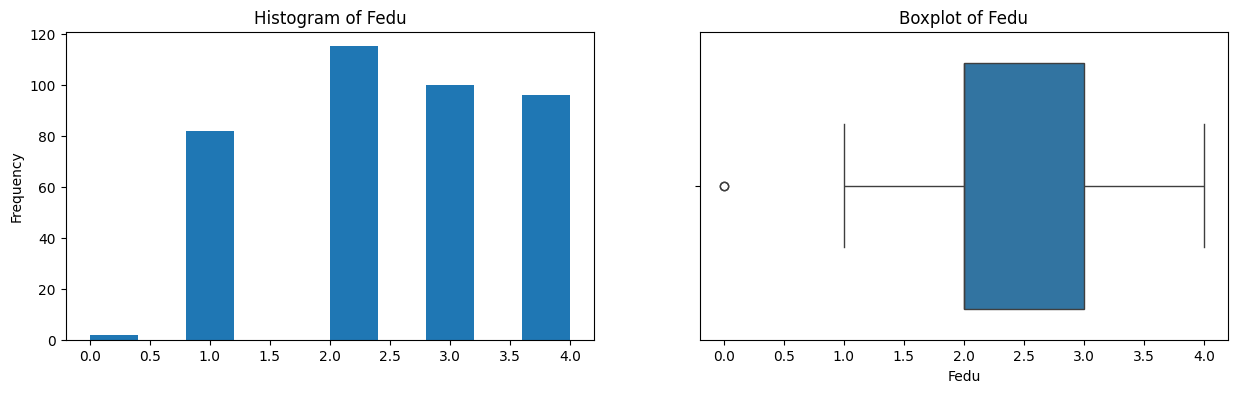

traveltime
Skew : 1.61


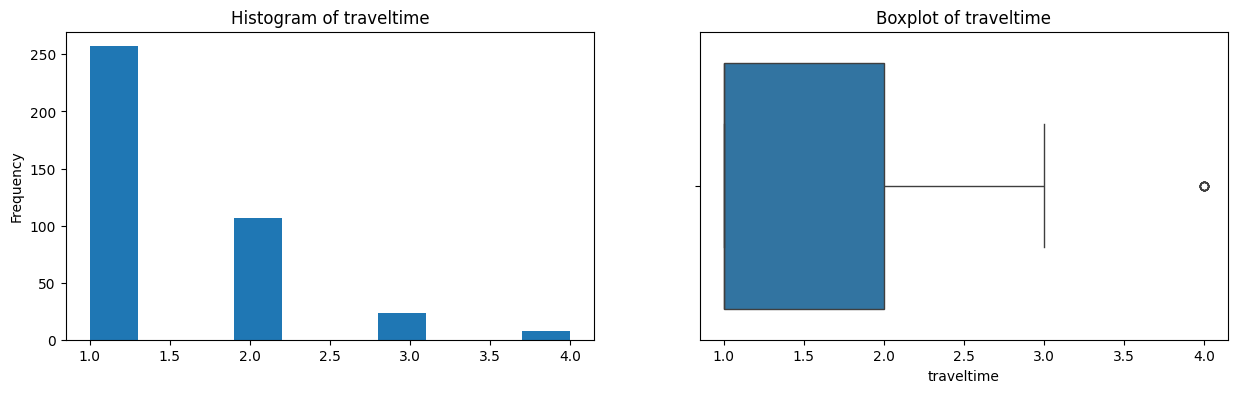

studytime
Skew : 0.63


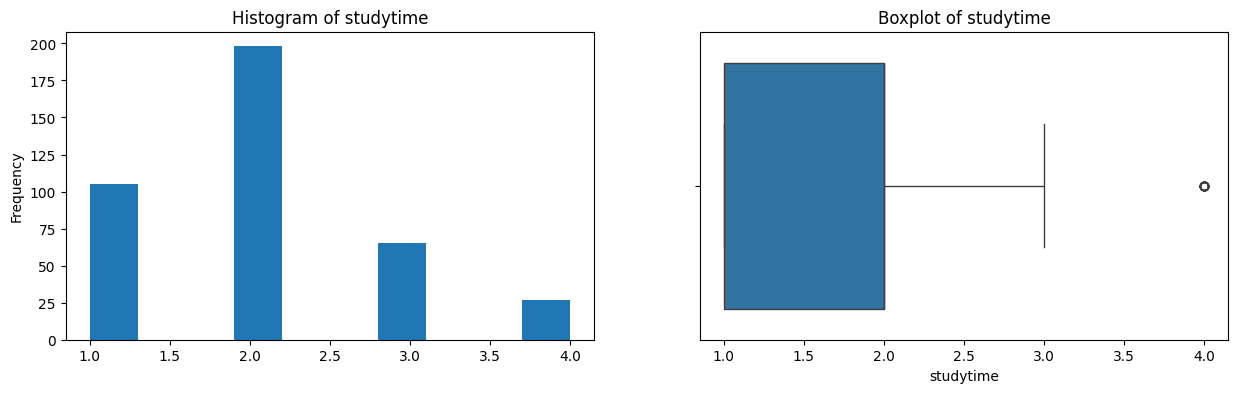

failures
Skew : 2.39


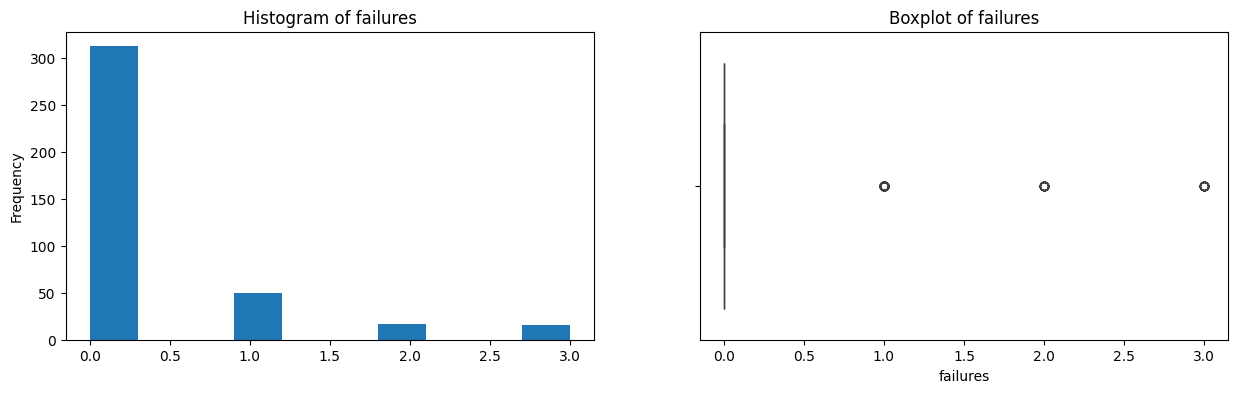

famrel
Skew : -0.95


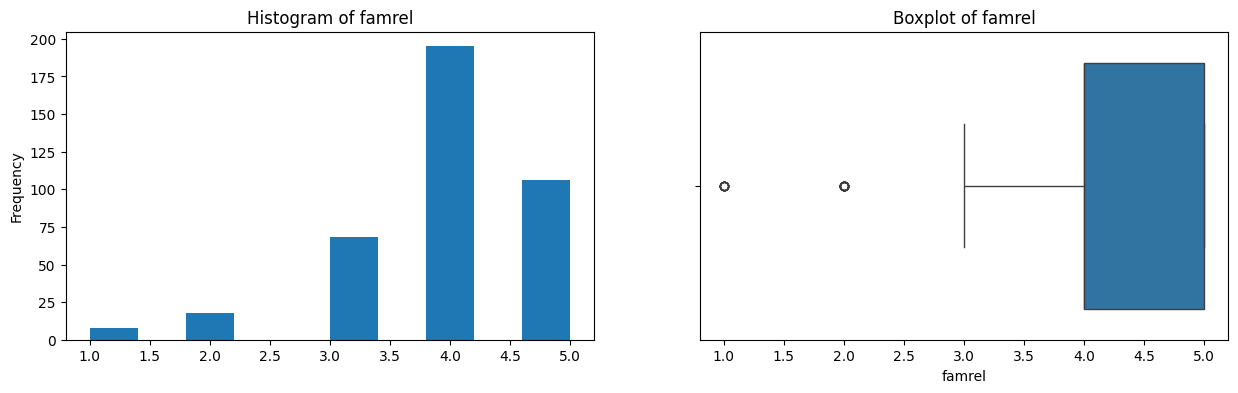

freetime
Skew : -0.16


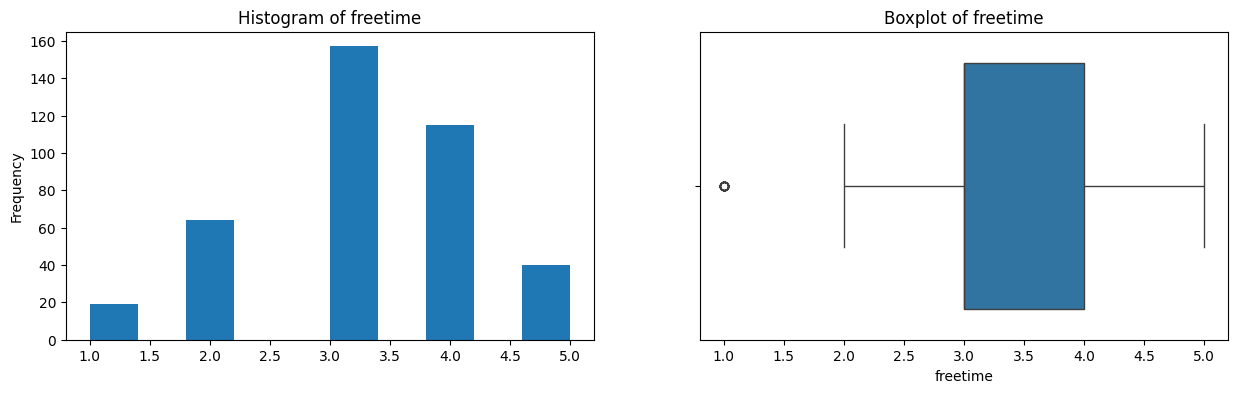

goout
Skew : 0.12


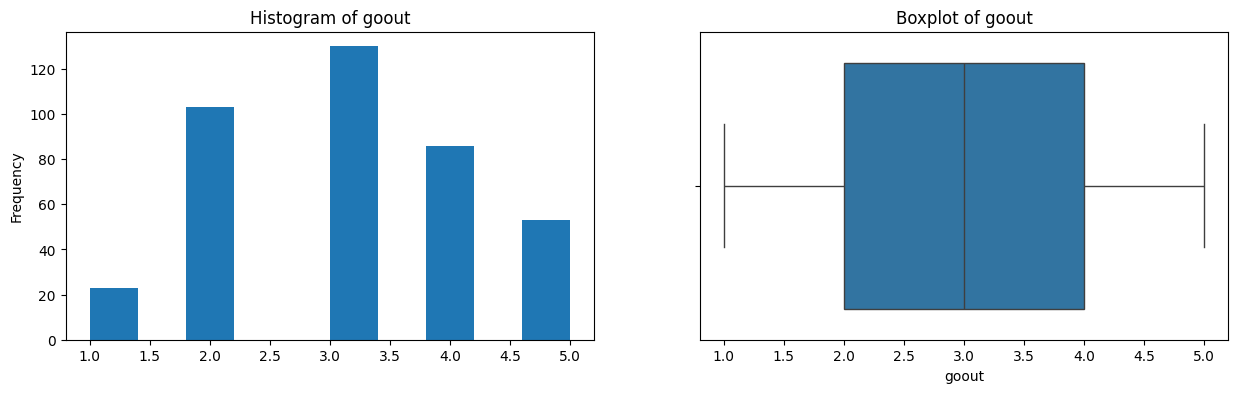

Dalc
Skew : 2.19


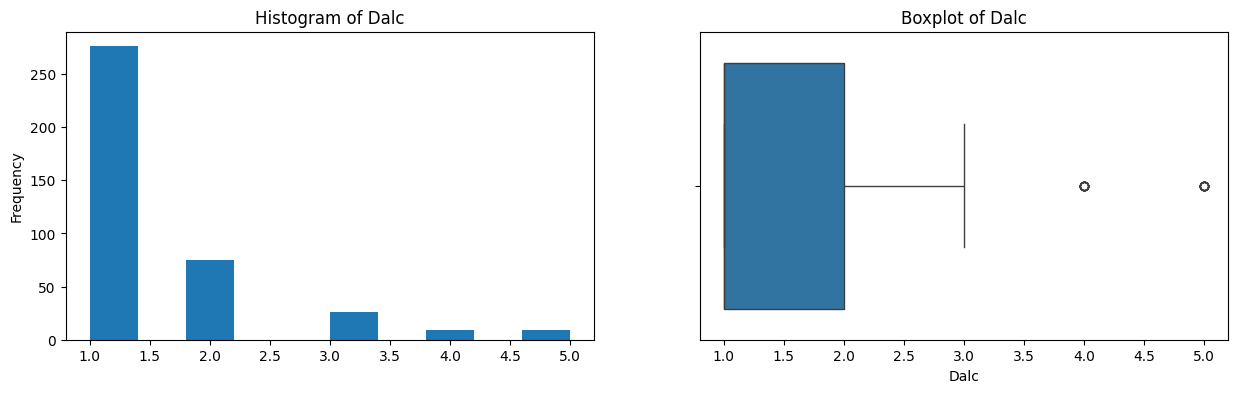

Walc
Skew : 0.61


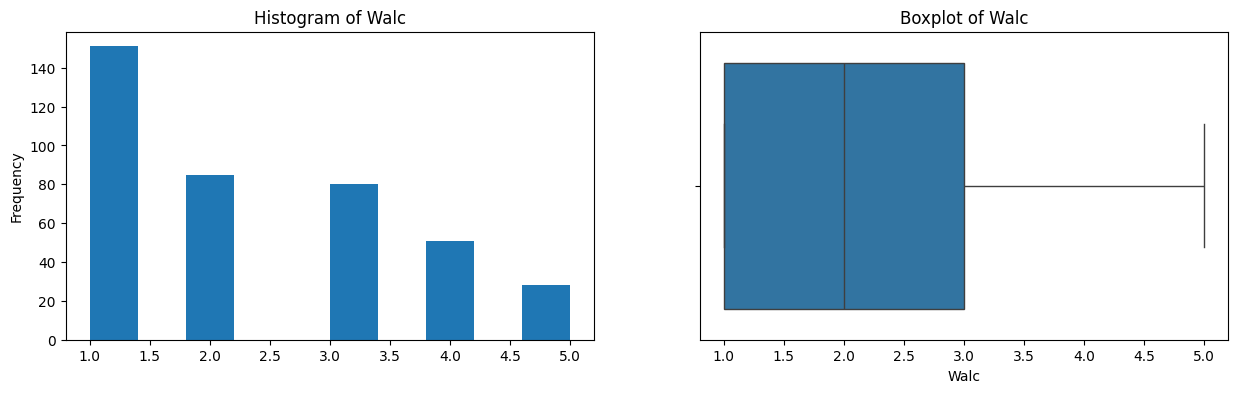

health
Skew : -0.49


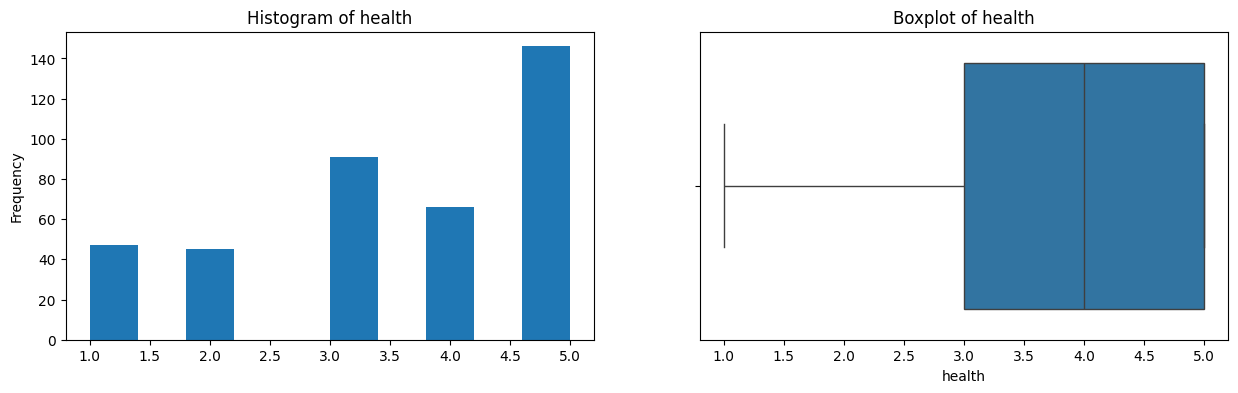

absences
Skew : 3.67


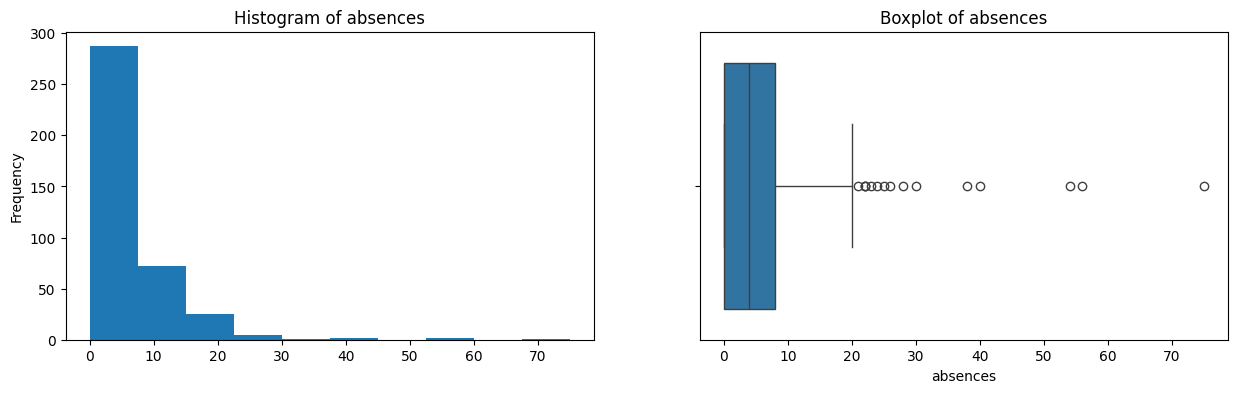

G1
Skew : 0.24


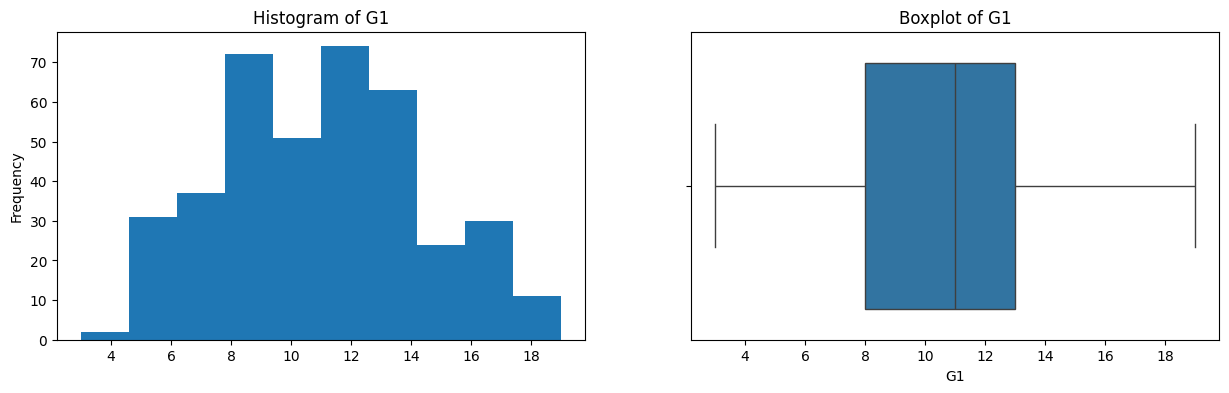

G2
Skew : -0.43


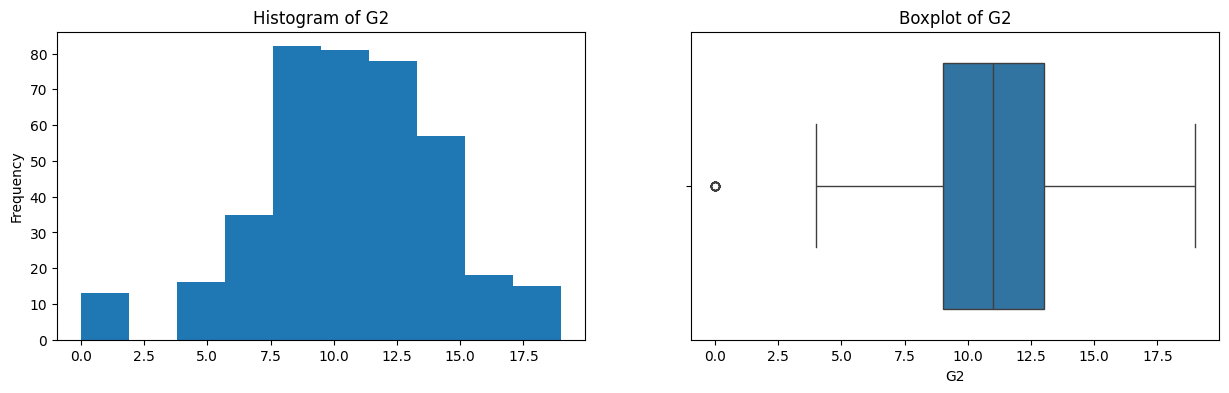

G3
Skew : -0.73


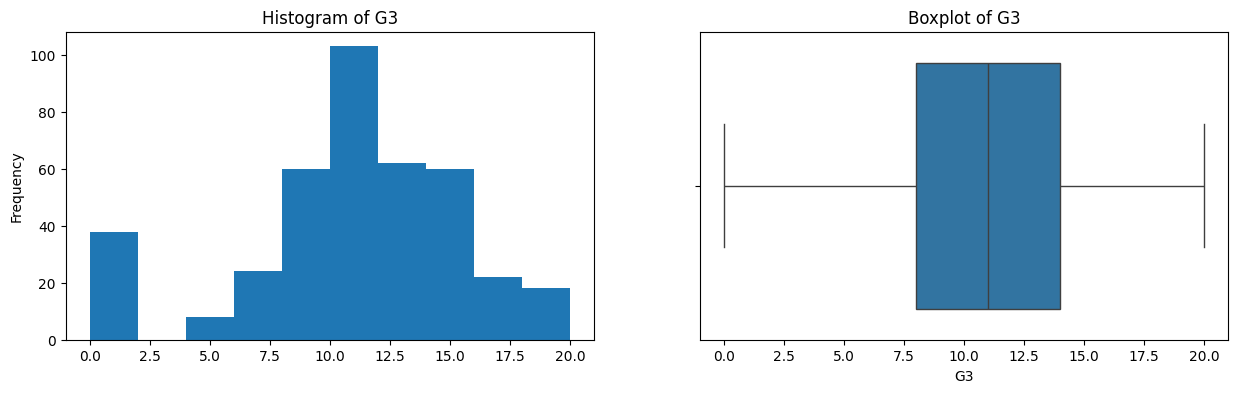

In [46]:
num_cols = training_data.select_dtypes(include=[float, int]).columns

# Iterate over each numeric column
for col in num_cols:
    print(col)
    print('Skew :', round(training_data[col].skew(), 2))

    # Plot the histogram and boxplot
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    training_data[col].hist(grid=False)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=training_data[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

In [52]:


# Assuming you have a DataFrame df with a 'Facies' column
# Example: df = pd.DataFrame({'Facies': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

# Colors
facies_colors = ['xkcd:goldenrod', 'xkcd:orange','xkcd:sienna','xkcd:violet',
                 'xkcd:olive','xkcd:turquoise', "xkcd:yellowgreen", 'xkcd:indigo', 'xkcd:blue']

# Labels
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh',
                 'MS',  'WS', 'D', 'PS', 'BS']

# Create facies_color_map dictionary that maps facies labels to their respective colors
facies_color_map = {label: facies_colors[ind] for ind, label in enumerate(facies_labels)}

# Function to label facies
def label_facies(row, labels):
    return labels[row['Facies'] - 1]

# Ensure df is defined
# df should already have a 'Facies' column; here's an example of a DataFrame
df = pd.DataFrame({'Facies': [1, 2, 3, 4, 5, 6, 7, 8, 9]})
# Establish facies label string in a new column 'FaciesLabels'
df['FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

# Optional: Preview the DataFrame to ensure it works correctly
print(df)


   Facies FaciesLabels
0       1           SS
1       2         CSiS
2       3         FSiS
3       4         SiSh
4       5           MS
5       6           WS
6       7            D
7       8           PS
8       9           BS


In [54]:


# Select only numeric columns
numeric_data = training_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

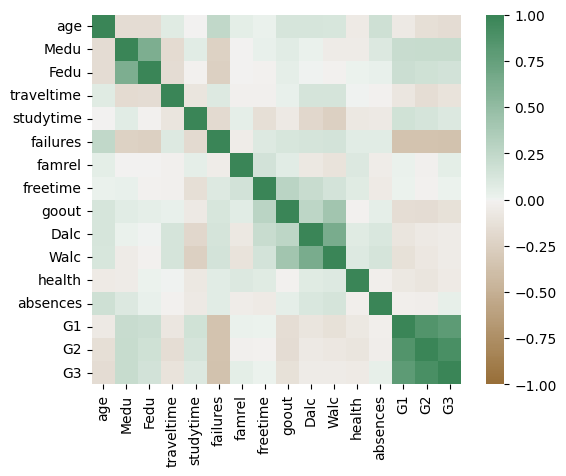

In [57]:
#import matplotlib.pyplot as plt
#import seaborn as sns
numeric_data = training_data.select_dtypes(include=[float, int])

correlation_full_health = numeric_data.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

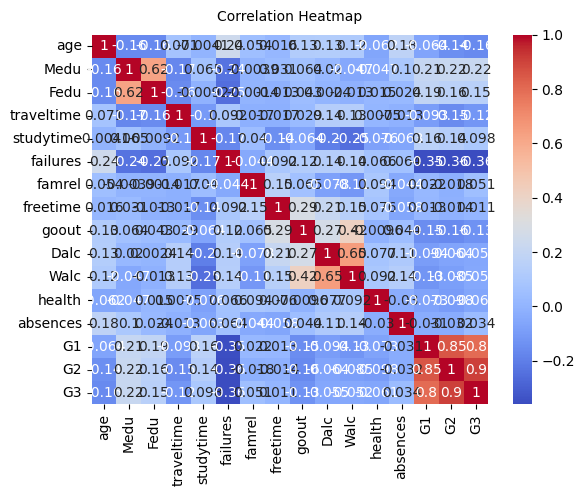

In [60]:
# Select only numeric columns
numeric_data = training_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap using the correlation matrix
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title for the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 10}, pad=10)

# Show the plot
plt.show()

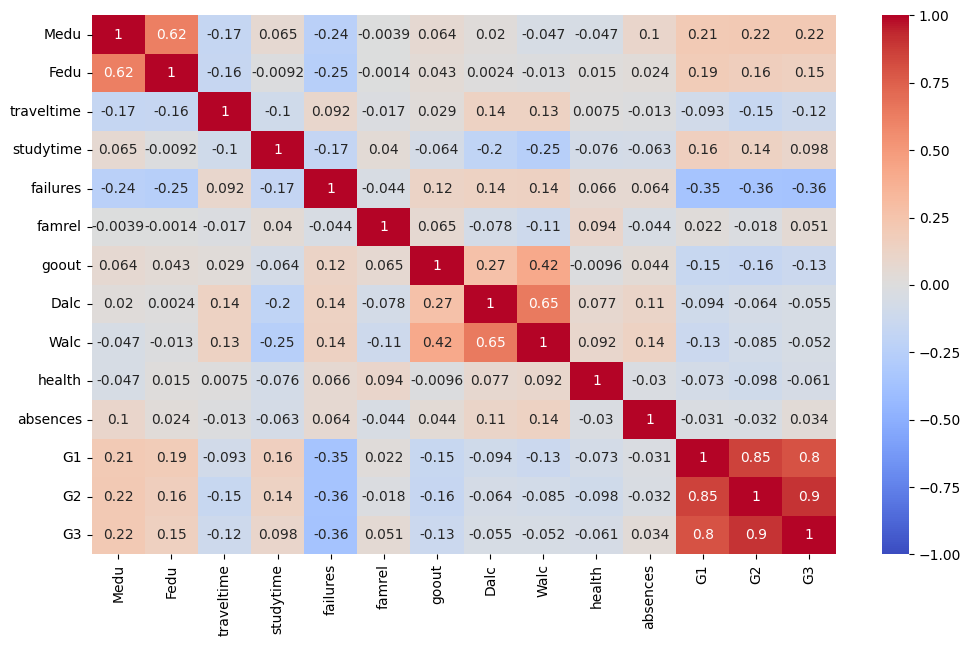

In [64]:
# Filter the DataFrame to include only numeric columns and drop 'age' and 'freetime'
numeric_data = training_data.drop(['age', 'freetime'], axis=1).select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Show the plot
plt.show()

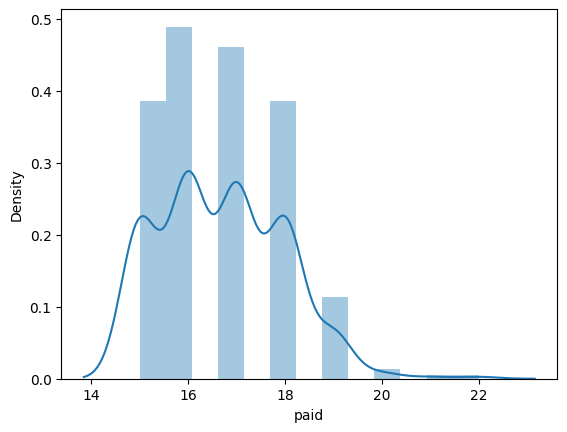

In [66]:

sns.distplot(training_data["age"], axlabel="paid");


<Figure size 1300x1700 with 0 Axes>

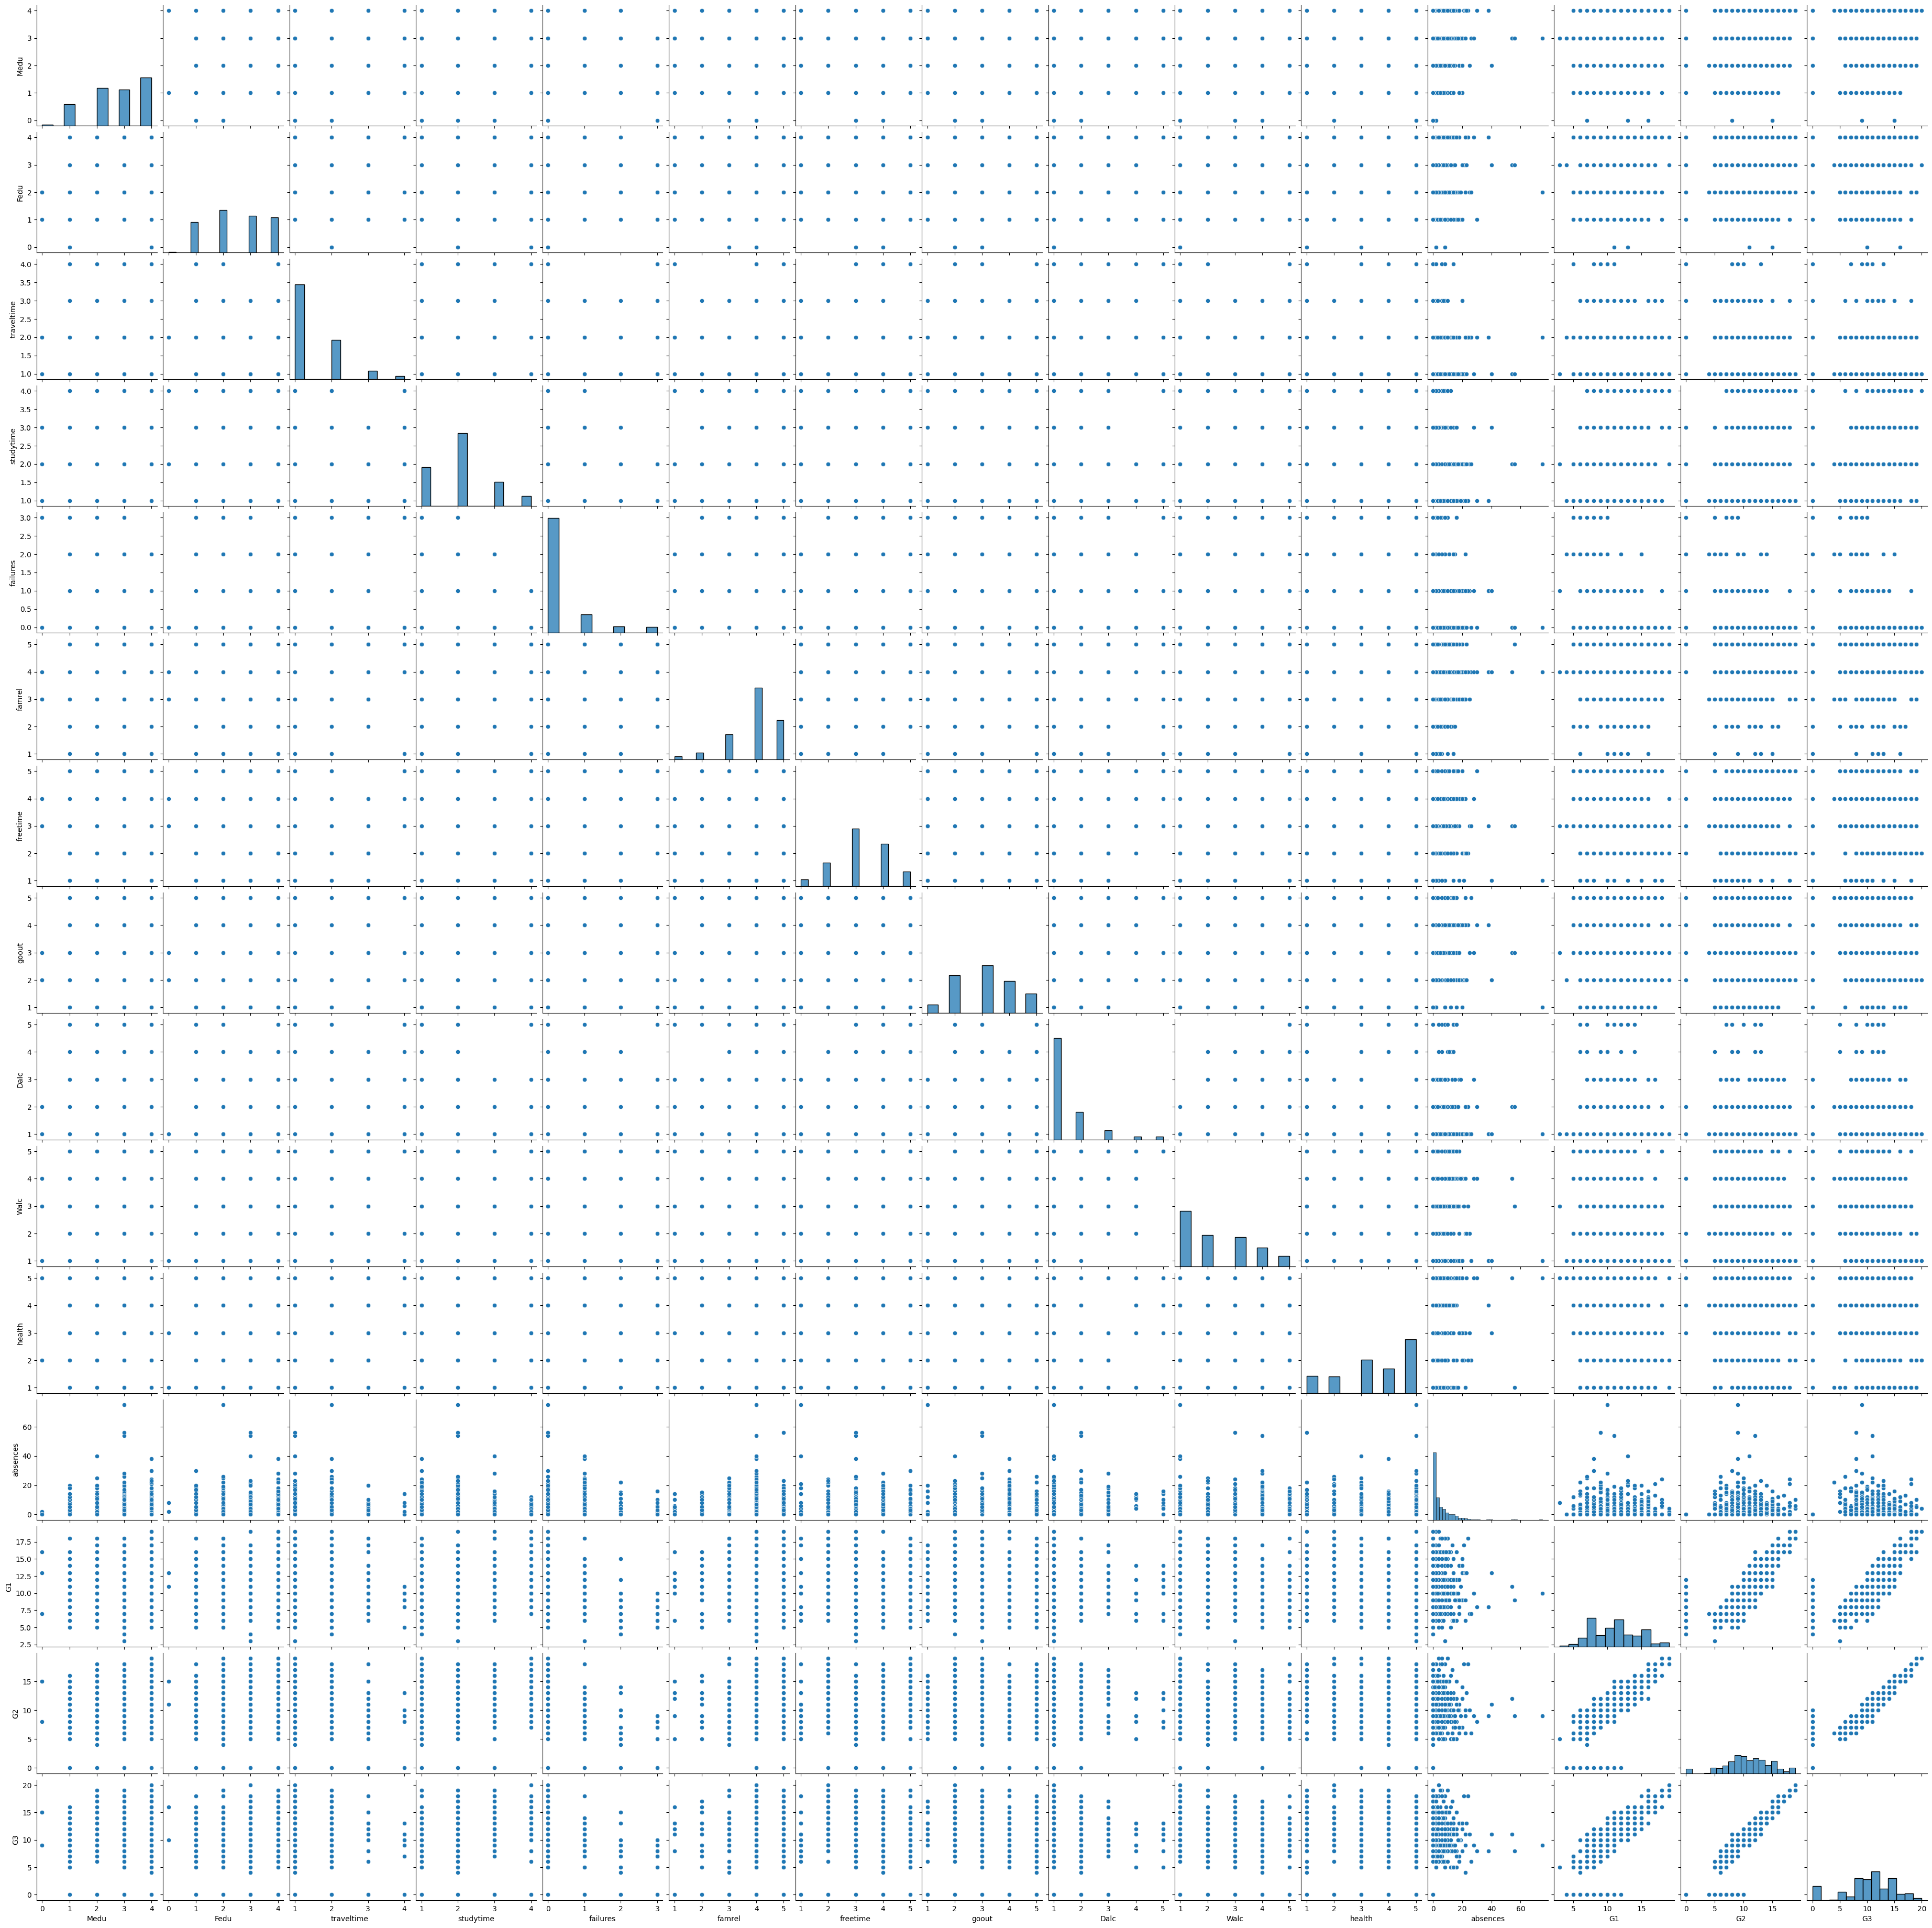

In [67]:
plt.figure(figsize=(13,17))
sns.pairplot(data=training_data.drop(['age','paid'],axis=1))
plt.show()